In [1]:
import pandas as pd
import warnings
import os
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from scipy.stats import boxcox
from matplotlib import pyplot
from numpy import sqrt
from math import exp
from numpy import log
from scipy.special import boxcox1p
from numpy import mean
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import pmdarima as pm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima
warnings.filterwarnings('ignore')
os.chdir("E:\Ginu_StudyMaterials\Sem2\TimeSeriesAnalysis")

In [2]:
# reading and printing dataset
#parse_dates=[['read_dt', 'read_tm']]) 
dataset = pd.read_csv("weather.csv", encoding = 'unicode_escape',parse_dates=True, na_values =("N/A", "NA", "--", " "))
dataset

,read_dt,read_tm,condition,temperature,pressure,humidity,wind_direction,wind_speed,air_quality_health_index
0,2009-12-30,08:00:00,Light Rainshower,3.1,101.5,97.0,E,13.0,NaN
1,2009-12-30,09:00:00,Light Rainshower,3.3,101.5,96.0,E,15.0,NaN
2,2009-12-30,10:00:00,Light Rain,3.3,101.6,97.0,E,15.0,3.0
3,2009-12-30,11:00:00,Light Rain,3.3,101.7,97.0,E,9.0,3.0
4,2009-12-30,12:00:00,Light Rain,3.6,101.7,97.0,E,11.0,3.0
...,...,...,...,...,...,...,...,...,...
9856,2011-01-04,06:00:00,Cloudy,0.0,102.4,90.0,E,13.0,NaN
9857,2011-01-04,07:00:00,Cloudy,0.3,102.3,92.0,ESE,15.0,NaN
9858,2011-01-04,08:00:00,Cloudy,0.4,102.4,90.0,E,8.0,NaN
9859,2011-01-04,09:00:00,Cloudy,0.8,102.4,89.0,E,9.0,NaN


#### Dataset Description

The dataset describes the daily temperature, pressure and humidity of each hour from 2009 to 2011. The temperature , humidity and pressure is recorded at each hour from 8 am to 11 pm. The dataset also conatins the details about the condition, the wind speed, direction of wind and the air quality health index.



| Variable                 |             Decription                    |    Type                 |
|--------------------------|-------------------------------------------|-------------------------|
| read_dt                  | Date in which the data is recorded        |  date type(categorical) |
| read_tm                  | Time in which the data is recorded        |  Continuous numerical   |
| condition                | Weather condition of the day              |  Nominal categorical    |
| temperature              | Temperature of the hour in degree celsius |  Continuous numerical   |
| pressure                 | Atmospheric Pressure of the hour in hPa   |  Continuous numerical   |
| humidity                 | Humidity of the hour                      |  Continuous numerical   |
| wind_direction           | Wind direction of the hour                |  Nominal categorical    |
| wind_speed               | Wind speed of that hour                   |  Continuous numerical   |
| air_quality_health_index | Air quality health index                  |  Continuous numerical   |


#### EDA

In [3]:
# printing first 5 rows
dataset.head(5)

,read_dt,read_tm,condition,temperature,pressure,humidity,wind_direction,wind_speed,air_quality_health_index
0,2009-12-30,08:00:00,Light Rainshower,3.1,101.5,97.0,E,13.0,NaN
1,2009-12-30,09:00:00,Light Rainshower,3.3,101.5,96.0,E,15.0,NaN
2,2009-12-30,10:00:00,Light Rain,3.3,101.6,97.0,E,15.0,3.0
3,2009-12-30,11:00:00,Light Rain,3.3,101.7,97.0,E,9.0,3.0
4,2009-12-30,12:00:00,Light Rain,3.6,101.7,97.0,E,11.0,3.0


In [4]:
# shape of the dataset
dataset.shape

(9861, 9)

There are 9861 rows and 9 columns in the dataset.So the dataset is balanced.

In [5]:
# to know the type of variables
types=dataset.dtypes
types

read_dt                      object
read_tm                      object
condition                    object
temperature                 float64
pressure                    float64
humidity                    float64
wind_direction               object
wind_speed                  float64
air_quality_health_index    float64
dtype: object

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9861 entries, 0 to 9860
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   read_dt                   9861 non-null   object 
 1   read_tm                   9861 non-null   object 
 2   condition                 9861 non-null   object 
 3   temperature               9861 non-null   float64
 4   pressure                  9506 non-null   float64
 5   humidity                  9858 non-null   float64
 6   wind_direction            8657 non-null   object 
 7   wind_speed                9861 non-null   float64
 8   air_quality_health_index  7722 non-null   float64
dtypes: float64(5), object(4)
memory usage: 693.5+ KB


The datatypes of the variables are correct. All decimal varibales are in float and integer values are in integer type. String varibales are in object type.

In [7]:
# data description to understand the summary statistics of data
dataset.describe()

,temperature,pressure,humidity,wind_speed,air_quality_health_index
count,9861.000000,9506.000000,9858.000000,9861.000000,7722.000000
mean,10.760836,101.441732,77.796003,13.445188,2.272598
std,5.202017,0.818979,13.298856,9.231536,0.576847
min,0.000000,98.300000,26.000000,0.000000,1.000000
25%,6.900000,101.000000,69.000000,8.000000,2.000000
50%,10.200000,101.500000,79.000000,13.000000,2.000000
75%,14.500000,102.000000,89.000000,18.000000,3.000000
max,29.200000,103.900000,100.000000,78.000000,6.000000


The atmospheric pressure variable has the highest mean and meadian among the variables and the air qality health index has the lowest mean and median.
The wind speed varibale has the highest standard deviation and the air qality health index has the lowest standard deviation.

The lowest temperature recorded is 0 degree celsius and the maximum tempertaure recorded is 29.20 degree celsius.
The lowest pressure recorded is 98.30 hPa and the maximum pressure recorded is 103.

In [8]:
# setting the precisin to limit the decimals
pd.set_option('precision', 2)
dataset.describe()

,temperature,pressure,humidity,wind_speed,air_quality_health_index
count,9861.00,9506.00,9858.0,9861.00,7722.00
mean,10.76,101.44,77.8,13.45,2.27
std,5.20,0.82,13.3,9.23,0.58
min,0.00,98.30,26.0,0.00,1.00
25%,6.90,101.00,69.0,8.00,2.00
50%,10.20,101.50,79.0,13.00,2.00
75%,14.50,102.00,89.0,18.00,3.00
max,29.20,103.90,100.0,78.00,6.00


In [9]:
# summary statistics of each varibale

In [10]:
dataset['read_dt'].describe()

count           9861
unique           371
top       2010-11-05
freq              40
Name: read_dt, dtype: object

In [11]:
dataset['read_tm'].describe()

count         9861
unique         721
top       21:00:00
freq           369
Name: read_tm, dtype: object

In [12]:
dataset['temperature'].describe()

count    9861.00
mean       10.76
std         5.20
min         0.00
25%         6.90
50%        10.20
75%        14.50
max        29.20
Name: temperature, dtype: float64

In [13]:
dataset['pressure'].describe()

count    9506.00
mean      101.44
std         0.82
min        98.30
25%       101.00
50%       101.50
75%       102.00
max       103.90
Name: pressure, dtype: float64

In [14]:
dataset['humidity'].describe()

count    9858.0
mean       77.8
std        13.3
min        26.0
25%        69.0
50%        79.0
75%        89.0
max       100.0
Name: humidity, dtype: float64

In [15]:
dataset['wind_direction'].describe()

count     8657
unique      17
top          E
freq      2685
Name: wind_direction, dtype: object

In [16]:
dataset['wind_speed'].describe()

count    9861.00
mean       13.45
std         9.23
min         0.00
25%         8.00
50%        13.00
75%        18.00
max        78.00
Name: wind_speed, dtype: float64

In [17]:
dataset['air_quality_health_index'].describe()

count    7722.00
mean        2.27
std         0.58
min         1.00
25%         2.00
50%         2.00
75%         3.00
max         6.00
Name: air_quality_health_index, dtype: float64

In [18]:
dataset['condition'].describe()

count       9861
unique        21
top       Cloudy
freq        3026
Name: condition, dtype: object

In [19]:
# checking if there is any null values present
dataset.isnull().sum()

read_dt                        0
read_tm                        0
condition                      0
temperature                    0
pressure                     355
humidity                       3
wind_direction              1204
wind_speed                     0
air_quality_health_index    2139
dtype: int64

There are null values in the dataset.

In [20]:
# checking for duplicates
dataset.duplicated().sum()

0

There are no duplicate values in the dataset

In [21]:
# correlation between variables
Correlations=dataset.corr()
Correlations

,temperature,pressure,humidity,wind_speed,air_quality_health_index
temperature,1.00,0.06,-0.58,0.01,-0.09
pressure,0.06,1.00,-0.09,-0.27,-0.08
humidity,-0.58,-0.09,1.00,-0.09,-0.07
wind_speed,0.01,-0.27,-0.09,1.00,-0.11
air_quality_health_index,-0.09,-0.08,-0.07,-0.11,1.00


There exists high negative correlation between the pressure and humidity. 

In [22]:
# identify the skewness of the data
dataset.skew()

temperature                 0.36
pressure                   -0.68
humidity                   -0.54
wind_speed                  0.93
air_quality_health_index    0.82
dtype: float64

The pressure and humidity is negatively skewed that is they are left skewed.

## Visualizations

In [23]:
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Histogram helps to identify the skewness and outliers in the data. It helps to identify the distribution is Gaussian or not.

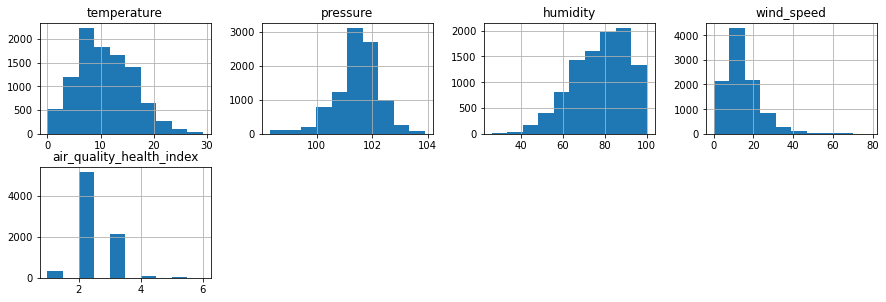

In [24]:
histogram=dataset.hist(layout=(4,4),sharey=False, figsize=[15,10])
pyplot.show()

None of the variables are following complete gaussian distribution. The pressure variable is following a rough gaussian distribution.

#### Density Plot

Density plots can be used to visualize the continuous numeric variables in the dataset. It can be used to get an overall idea about the data to identify whether it follows gaussian distribution or not.

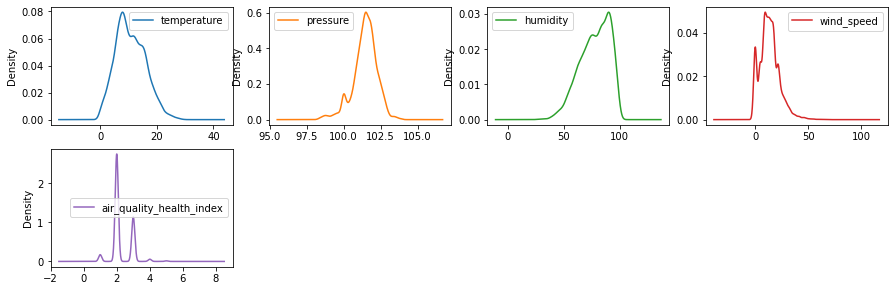

In [25]:
K= dataset.plot(kind='density',subplots=True,sharex=False,layout=(4,4),sharey=False, figsize=[15,10])

The pressure variable is following a rough gaussian distribution.

#### Box and whisker plots

Box plots can be used to visualize the continuous numerical variables. It gives the imformation about the outliers more efficiently. The interquartile range, variance, minimum and maximum value can be understood from the box plot.

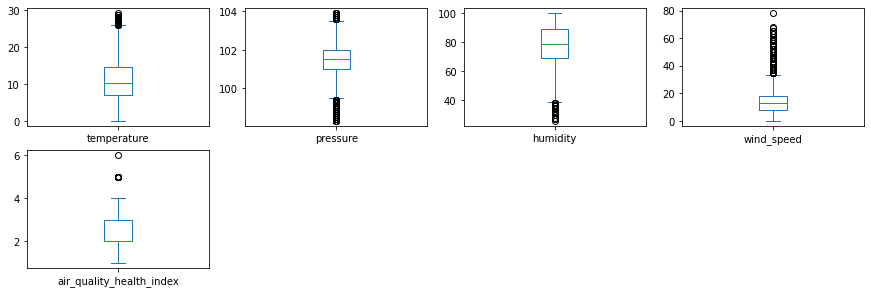

In [26]:
boxplot = dataset.plot(kind='box',subplots=True, layout =(4,4), sharex= False, sharey= False, figsize=[15,10])

All the variables are skewed and have outliers in them.

#### Correlation matrix plot

Correlation is an indication of how related the variables are. There is inversely and direct proportion in correlation.

    The value -1 indicates that there is a perfectly negative linear correlation between the two variables.
    The value  0 indicates that there is no linear correlation between two variables.
    The value 1 indicates that there is a perfectly positive linear correlation between two variables

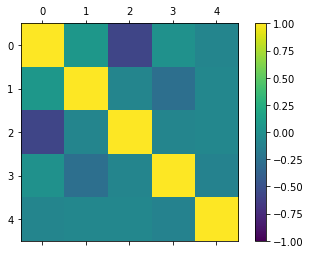

In [27]:
#Correlation Matrix
correlations = dataset.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

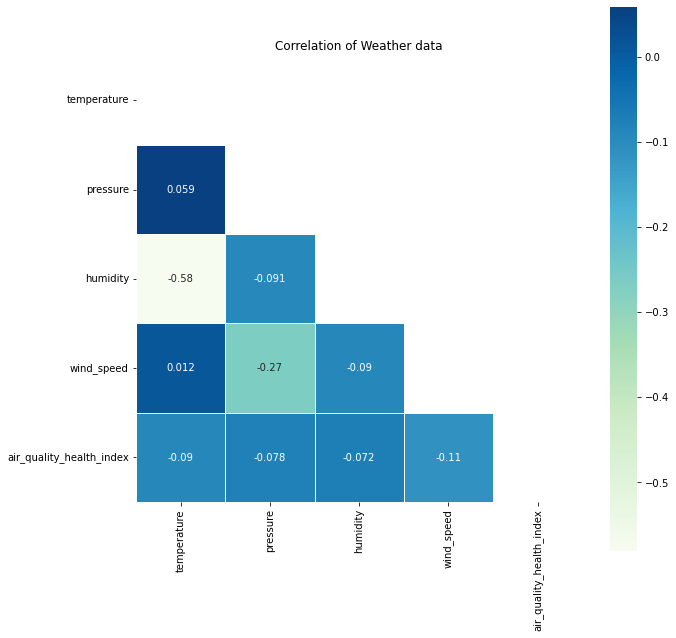

In [28]:
plt.figure(figsize=(10,10))
mask=np.zeros_like(dataset.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=dataset.corr(),annot=True,square=True,mask=mask,cmap="GnBu",linewidths=1,linecolor="white")
plt.title("Correlation of Weather data")
plt.show()

The variables pressure and temperature are moderately positive correlated and windspeed and temperature is less correlated. All the other varaibles are negatively correlated to each other.

#### Univariate visualizations

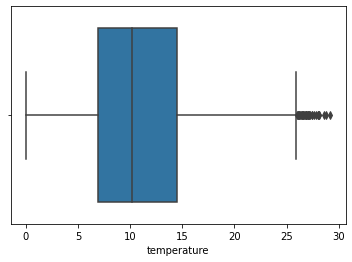

In [29]:
# temperature
sns.boxplot(dataset['temperature'])
plt.show()

The data has outliers and is right skewed. The whiskers are of different length and the eman and median are different.

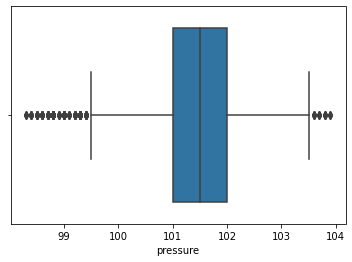

In [30]:
# pressure
sns.boxplot(dataset['pressure'])
plt.show()

The data has outliers and the data is not symmetrical. The whiskers are of roughly equal length and the eman and median are roughly equal.

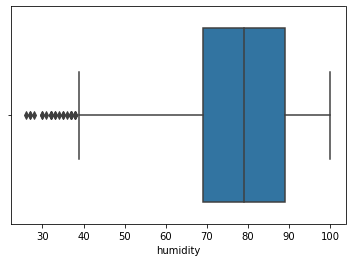

In [31]:
# humidity
sns.boxplot(dataset['humidity'])
plt.show()

The data has outliers and is left skewed. The whiskers are of different length and the eman and median roughly equal.

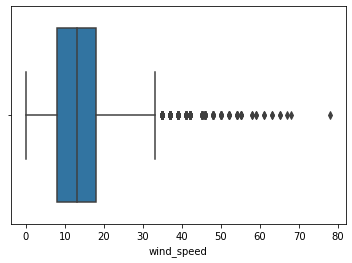

In [32]:
# wind speed
sns.boxplot(dataset['wind_speed'])
plt.show()

The data has outliers and is right skewed. The whiskers are of different length and the eman and median roughly equal.

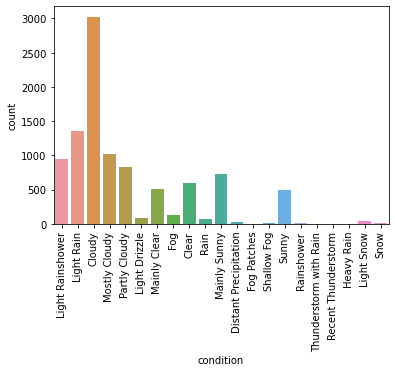

In [33]:
# condition
chart = sns.countplot(x='condition', data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

Most of the days were cloudy. There were very less days with thunderstorm and heavy rain.

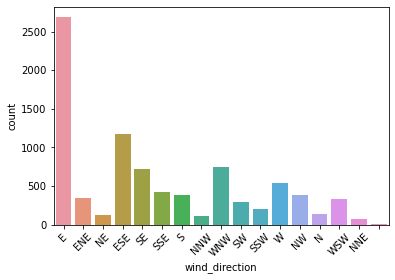

In [34]:
# wind_direction
chart = sns.countplot(x='wind_direction', data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

The wind direction is East in most days and North-NothEast in least days.

#### Bivariate plots

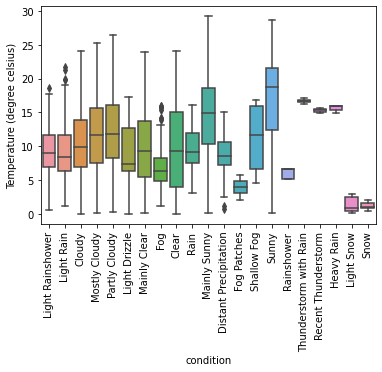

In [35]:
# condition and temperature

chart=sns.boxplot(x="condition", y="temperature", data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.ylabel("Temperature (degree celsius)")
plt.show()

Sunny days have the highest median. There are outliers present in some group.

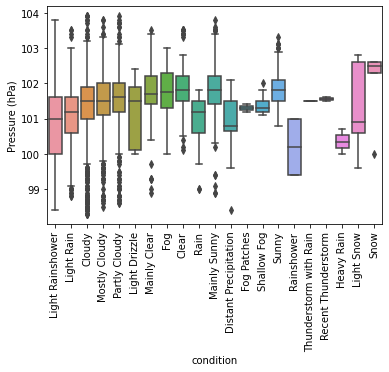

In [36]:
# condition and pressure

chart=sns.boxplot(x="condition", y="pressure", data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.ylabel("Pressure (hPa)")
plt.show()

There are outliers present in some groups.

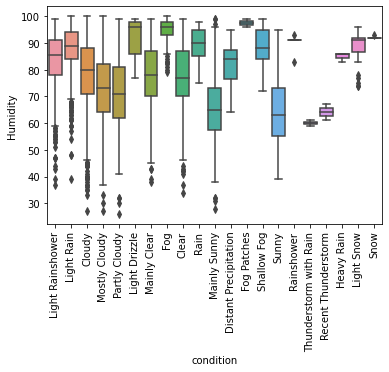

In [37]:
# condition and humidity

chart=sns.boxplot(x="condition", y="humidity", data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.ylabel("Humidity")
plt.show()

There are outliers present in some groups.

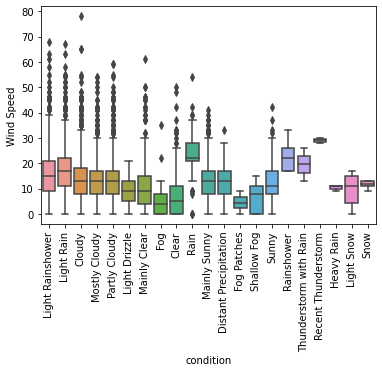

In [38]:
# condition and wind_speed

chart=sns.boxplot(x="condition", y="wind_speed", data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.ylabel("Wind Speed")
plt.show()

There are outliers present in some groups.

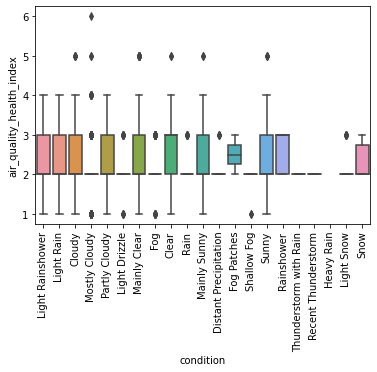

In [39]:
# condition and air_quality_health_index

chart=sns.boxplot(x="condition", y="air_quality_health_index", data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.ylabel("air_quality_health_index")
plt.show()

There are outliers present in some groups.The median is found to be overlapped with either the lower quartile or the upper quartile.

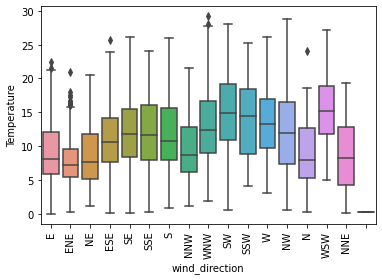

In [40]:
# wind_direction and temperature

chart=sns.boxplot(x="wind_direction", y="temperature", data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.ylabel("Temperature")
plt.show()

There are outliers present in some groups.

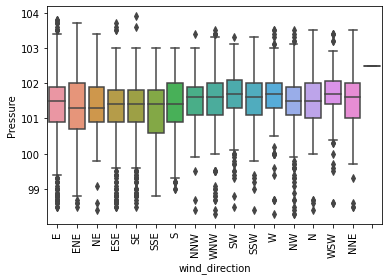

In [41]:
# wind_direction and pressure

chart=sns.boxplot(x="wind_direction", y="pressure", data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.ylabel("Pressure")
plt.show()

There are outliers present in some groups.

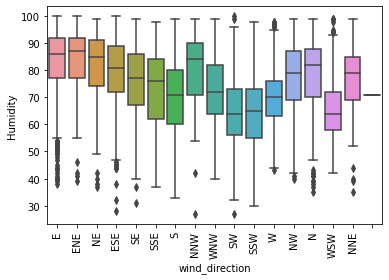

In [42]:
# wind_direction and humidity

chart=sns.boxplot(x="wind_direction", y="humidity", data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.ylabel("Humidity")
plt.show()

There are outliers present in some groups.

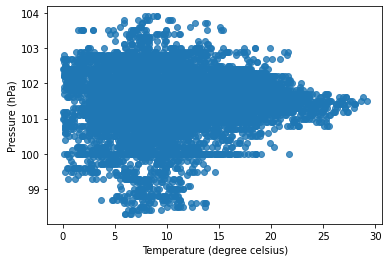

In [43]:
# temperature and pressure

sns.regplot(x='temperature', y='pressure', data=dataset,fit_reg=False)
plt.xlabel("Temperature (degree celsius)")
plt.ylabel("Pressure (hPa)")
plt.show()

There is a small positive relation with the temperature and the pressure. The datapoints are clustered together.

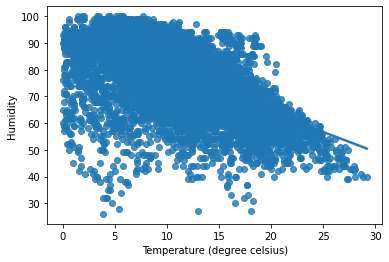

In [44]:
# temperature and humidity

sns.regplot(x='temperature', y='humidity', data=dataset)
plt.xlabel("Temperature (degree celsius)")
plt.ylabel("Humidity")
plt.show()

There is a small negative relation with the temperature and the humidity. The datapoints are clustered together.

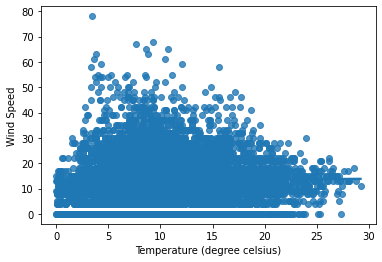

In [45]:
# temperature and wind_speed

sns.regplot(x='temperature', y='wind_speed', data=dataset)
plt.xlabel("Temperature (degree celsius)")
plt.ylabel("Wind Speed")
plt.show()

There is no relation with the temperature and the wind speed. The datapoints are clustered together.

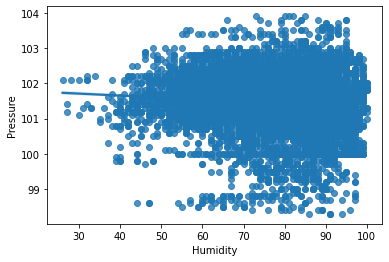

In [46]:
# humidity and pressure

sns.regplot(x='humidity', y='pressure', data=dataset)
plt.xlabel("Humidity")
plt.ylabel("Pressure")
plt.show()

There is no relation with the humidity and the pressure. The datapoints are clustered together.

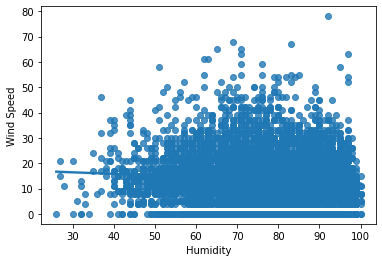

In [47]:
# humidity and wind_speed

sns.regplot(x='humidity', y='wind_speed', data=dataset)
plt.xlabel("Humidity")
plt.ylabel("Wind Speed")
plt.show()

There is no relation with the humidity and the wind speed. The datapoints are clustered together.

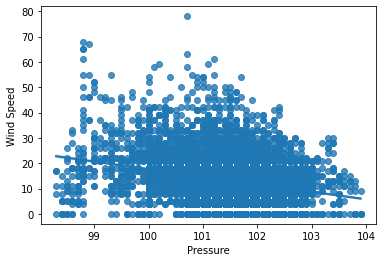

In [48]:
# pressure and wind_speed

sns.regplot(x='pressure', y='wind_speed', data=dataset)
plt.xlabel("Pressure")
plt.ylabel("Wind Speed")
plt.show()

There is no relation with the pressure and the wind speed. The datapoints are clustered together.

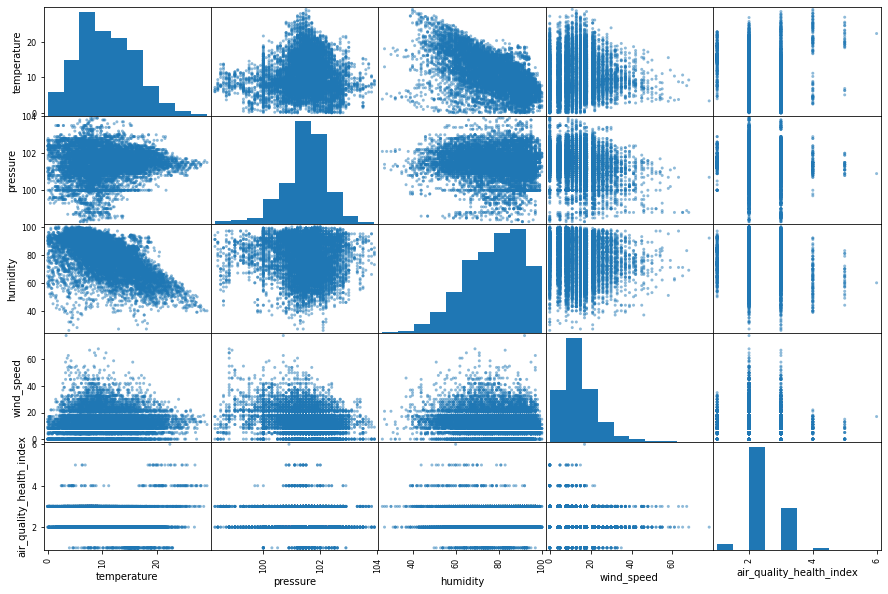

In [49]:
# scatter plots
from pandas.plotting import scatter_matrix
data = scatter_matrix(dataset,  figsize=[15,10])

#### Lag Plot and Other visualizations withonly the date and temperature column as separete data

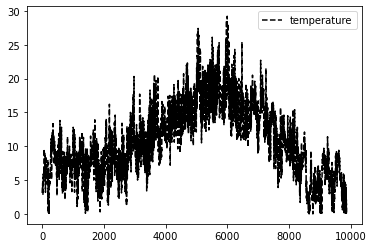

In [50]:
# plotting data in different styles
series = dataset[['read_dt', 'temperature']]

series.plot(style ='k--')
pyplot.show()

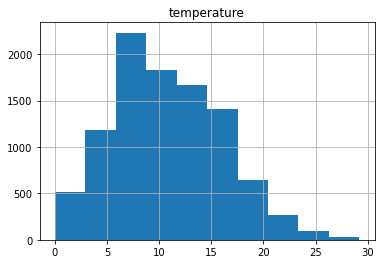

In [51]:
series.hist()
pyplot.show()

The data is roughly gaussian distributed.

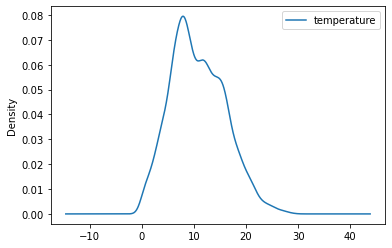

In [52]:
series.plot(kind='kde')
pyplot.show()

The data is roughly gaussian distributed.

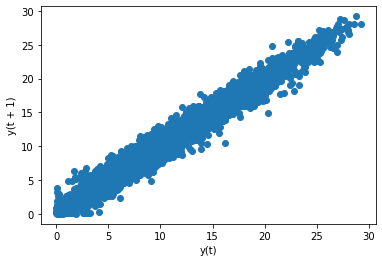

In [53]:
from pandas.plotting import lag_plot
series = series['temperature'].squeeze()
lag_plot(series)
pyplot.show()

This sample lag plot of the dataset exhibits a linear pattern. This shows that the data are strongly non-random and further suggests that an autoregressive model might be appropriate.

## Resampling

#### Downsampling to daily data from hour data

In [54]:
df = dataset[['read_dt','read_tm', 'temperature']]
df['date'] = pd.to_datetime(df.pop('read_dt')) + pd.to_timedelta(df.pop('read_tm'))

In [55]:
df

,temperature,date
0,3.1,2009-12-30 08:00:00
1,3.3,2009-12-30 09:00:00
2,3.3,2009-12-30 10:00:00
3,3.3,2009-12-30 11:00:00
4,3.6,2009-12-30 12:00:00
...,...,...
9856,0.0,2011-01-04 06:00:00
9857,0.3,2011-01-04 07:00:00
9858,0.4,2011-01-04 08:00:00
9859,0.8,2011-01-04 09:00:00


In [56]:
# setting date as index
df1 = df.set_index('date')
df1

,temperature
date,
2009-12-30 08:00:00,3.1
2009-12-30 09:00:00,3.3
2009-12-30 10:00:00,3.3
2009-12-30 11:00:00,3.3
2009-12-30 12:00:00,3.6
...,...
2011-01-04 06:00:00,0.0
2011-01-04 07:00:00,0.3
2011-01-04 08:00:00,0.4


In [57]:
# downsampling the hour data to daily data
df11 = df1.resample('D').mean().reset_index()

df11

,date,temperature
0,2009-12-30,3.93
1,2009-12-31,4.65
2,2010-01-01,7.85
3,2010-01-02,7.11
4,2010-01-03,5.90
...,...,...
366,2010-12-31,2.97
367,2011-01-01,2.75
368,2011-01-02,2.49
369,2011-01-03,2.40


In [58]:
# downsampling with multiple columns

df2 = dataset[['read_dt','read_tm', 'temperature', 'pressure', 'humidity']]

df2['date'] = pd.to_datetime(df2.pop('read_dt')) + pd.to_timedelta(df2.pop('read_tm'))

df2 = df2.set_index('date')

agg_dict = {'temperature':'mean', 'pressure':'mean', 'humidity':'mean'}

# Then pass it to the resample using agg function
df3=df2.resample('D').agg(agg_dict).reset_index()
df3

,date,temperature,pressure,humidity
0,2009-12-30,3.93,101.69,95.18
1,2009-12-31,4.65,101.32,93.12
2,2010-01-01,7.85,100.54,92.65
3,2010-01-02,7.11,101.97,94.69
4,2010-01-03,5.90,102.22,94.79
...,...,...,...,...
366,2010-12-31,2.97,102.02,71.83
367,2011-01-01,2.75,102.12,76.00
368,2011-01-02,2.49,102.40,82.26
369,2011-01-03,2.40,102.41,86.21


#### Downsampling the hour data to monthly data

In [59]:
# downsampling to month start frequency from hour data with single column
df_down_single = df1.resample('MS').mean().reset_index()

df_down_single

,date,temperature
0,2009-12-01,4.31
1,2010-01-01,7.39
2,2010-02-01,7.02
3,2010-03-01,7.46
4,2010-04-01,9.37
5,2010-05-01,11.90
6,2010-06-01,14.65
7,2010-07-01,18.00
8,2010-08-01,17.87
9,2010-09-01,15.06


In [60]:
# downsampling with multiple columns

df4 = dataset[['read_dt','read_tm', 'temperature', 'pressure', 'humidity']]

df4['date'] = pd.to_datetime(df4.pop('read_dt')) + pd.to_timedelta(df4.pop('read_tm'))

df4 = df4.set_index('date')

agg_dict = {'temperature':'mean', 'pressure':'mean', 'humidity':'mean'}

# Then pass it to the resample using agg function
df_d_m=df4.resample('MS').agg(agg_dict).reset_index()
df_d_m

,date,temperature,pressure,humidity
0,2009-12-01,4.31,101.50,94.09
1,2010-01-01,7.39,100.98,87.58
2,2010-02-01,7.02,101.38,87.09
3,2010-03-01,7.46,101.48,80.16
4,2010-04-01,9.37,101.26,76.50
5,2010-05-01,11.90,101.57,71.90
6,2010-06-01,14.65,101.72,70.79
7,2010-07-01,18.00,101.68,65.08
8,2010-08-01,17.87,101.44,65.77
9,2010-09-01,15.06,101.43,77.15


#### Upsampling from hour to 30 minutes

In [61]:
df4 = dataset[['read_dt','read_tm', 'temperature', 'pressure', 'humidity']]

df4['date'] = pd.to_datetime(df4.pop('read_dt')) + pd.to_timedelta(df4.pop('read_tm'))

df4 = df4.set_index('date')

agg_dict = {'temperature':'mean', 'pressure':'mean', 'humidity':'mean'}

# Then pass it to the resample using agg function
df_up_m=df4.resample('30min').agg(agg_dict).reset_index()
df_up_m

,date,temperature,pressure,humidity
0,2009-12-30 08:00:00,3.1,101.5,97.0
1,2009-12-30 08:30:00,NaN,NaN,NaN
2,2009-12-30 09:00:00,3.3,101.5,96.0
3,2009-12-30 09:30:00,NaN,NaN,NaN
4,2009-12-30 10:00:00,3.3,101.6,97.0
...,...,...,...,...
17760,2011-01-04 08:00:00,0.4,102.4,90.0
17761,2011-01-04 08:30:00,NaN,NaN,NaN
17762,2011-01-04 09:00:00,0.8,102.4,89.0
17763,2011-01-04 09:30:00,NaN,NaN,NaN


There are many missing values when we use upsampling technique. 

In the original dataset, some dates doesn't have the hourly data details from 8 am to 11 pm. Some hourly details are not recorded. So it is better to use downsampling for this data.

Among the downsampling, it is good to downsample the data to daily basis from hour basis data.

## Interpolation 

#### Interpolation through Padding on upsampled data

Interpolation is used to fill the NaNs created after performing resampling. Here there are NaNs in the data after upsampling. So Iam using padding interpolation method to replace the NaNs.

Interpolation through padding means copying the value just before a missing entry.

While using padding interpolation, you need to specify a limit. The limit is the maximum number of nans the method can fill consecutively.

In [62]:

interpolated = df_up_m.interpolate(method='pad', limit=7)

In [63]:
interpolated

,date,temperature,pressure,humidity
0,2009-12-30 08:00:00,3.1,101.5,97.0
1,2009-12-30 08:30:00,3.1,101.5,97.0
2,2009-12-30 09:00:00,3.3,101.5,96.0
3,2009-12-30 09:30:00,3.3,101.5,96.0
4,2009-12-30 10:00:00,3.3,101.6,97.0
...,...,...,...,...
17760,2011-01-04 08:00:00,0.4,102.4,90.0
17761,2011-01-04 08:30:00,0.4,102.4,90.0
17762,2011-01-04 09:00:00,0.8,102.4,89.0
17763,2011-01-04 09:30:00,0.8,102.4,89.0


In [64]:
interpolated.isnull().sum()

date           0
temperature    0
pressure       0
humidity       0
dtype: int64

There are no NaN values in the data.

#### filling NaN with bfill() on upsampled data

In [65]:
# filling NaN with bfill()
interpolated_bfill = df_up_m.bfill()
interpolated_bfill

,date,temperature,pressure,humidity
0,2009-12-30 08:00:00,3.1,101.5,97.0
1,2009-12-30 08:30:00,3.3,101.5,96.0
2,2009-12-30 09:00:00,3.3,101.5,96.0
3,2009-12-30 09:30:00,3.3,101.6,97.0
4,2009-12-30 10:00:00,3.3,101.6,97.0
...,...,...,...,...
17760,2011-01-04 08:00:00,0.4,102.4,90.0
17761,2011-01-04 08:30:00,0.8,102.4,89.0
17762,2011-01-04 09:00:00,0.8,102.4,89.0
17763,2011-01-04 09:30:00,1.5,102.4,84.0


In [66]:
interpolated_bfill.isnull().sum()

date           0
temperature    0
pressure       0
humidity       0
dtype: int64

#### filling NaN with ffill() on upsampled data

In [67]:
# filling NaN with ffill()
interpolated_ffill = df_up_m.ffill()
interpolated_ffill

,date,temperature,pressure,humidity
0,2009-12-30 08:00:00,3.1,101.5,97.0
1,2009-12-30 08:30:00,3.1,101.5,97.0
2,2009-12-30 09:00:00,3.3,101.5,96.0
3,2009-12-30 09:30:00,3.3,101.5,96.0
4,2009-12-30 10:00:00,3.3,101.6,97.0
...,...,...,...,...
17760,2011-01-04 08:00:00,0.4,102.4,90.0
17761,2011-01-04 08:30:00,0.4,102.4,90.0
17762,2011-01-04 09:00:00,0.8,102.4,89.0
17763,2011-01-04 09:30:00,0.8,102.4,89.0


In [68]:
interpolated_ffill.isnull().sum()

date           0
temperature    0
pressure       0
humidity       0
dtype: int64

## Sliding Window Shifting

#### Sliding Window with 1 Step with the original dataset

In [69]:
# with the original dataset
df_sliding = dataset.copy()
df_sliding = df_sliding[['temperature']]
df_sliding 

,temperature
0,3.1
1,3.3
2,3.3
3,3.3
4,3.6
...,...
9856,0.0
9857,0.3
9858,0.4
9859,0.8


In [70]:
 # single shifting
sdata=concat([df_sliding.shift(1),df_sliding], axis=1)
sdata.columns=['t','t+1']
sdata

,t,t+1
0,NaN,3.1
1,3.1,3.3
2,3.3,3.3
3,3.3,3.3
4,3.3,3.6
...,...,...
9856,0.7,0.0
9857,0.0,0.3
9858,0.3,0.4
9859,0.4,0.8


In [71]:
# 2 step window shifting
mdata=concat([df_sliding.shift(2),df_sliding.shift(1), df_sliding], axis=1)
mdata.columns=['t-1','t','t+1']
print(mdata.head(5))

   t-1    t  t+1
0  NaN  NaN  3.1
1  NaN  3.1  3.3
2  3.1  3.3  3.3
3  3.3  3.3  3.3
4  3.3  3.3  3.6


In [72]:
# 3 step window shifting
mdataf=concat([df_sliding.shift(3),df_sliding.shift(2),df_sliding.shift(1), df_sliding], axis=1)
mdataf.columns=['t-2','t-1','t','t+1']
print(mdataf.head(5))

   t-2  t-1    t  t+1
0  NaN  NaN  NaN  3.1
1  NaN  NaN  3.1  3.3
2  NaN  3.1  3.3  3.3
3  3.1  3.3  3.3  3.3
4  3.3  3.3  3.3  3.6


## Transform methods

In [73]:
# using the original dataset
df_sq = dataset['temperature'].squeeze()
df_sq

0       3.1
1       3.3
2       3.3
3       3.3
4       3.6
       ... 
9856    0.0
9857    0.3
9858    0.4
9859    0.8
9860    1.5
Name: temperature, Length: 9861, dtype: float64

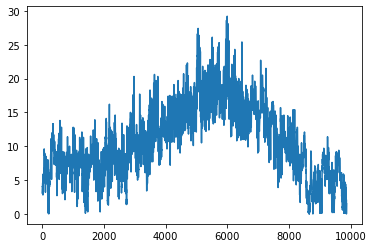

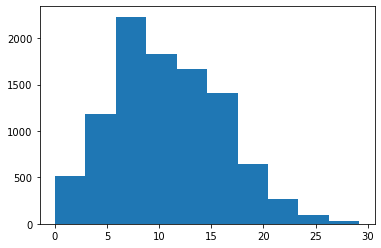

In [74]:
# line plot
pyplot.plot(df_sq)
pyplot.show()
# histogram
pyplot.hist(df_sq)
pyplot.show()

#### Square Root Transform on the original dataset

A time series that has a quadratic growth trend can be made linear by taking the square root.

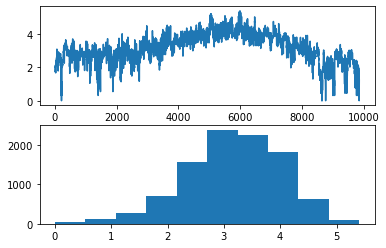

In [75]:
# Square root transform with original dataset
transform = series = sqrt(df_sq)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

The square root transform reduced the growth trend to be linear and changed the distribution of observations to be perhaps nearly Gaussian.

#### Square Root Transform on the resampled monthly data

In [76]:
# using the resampled monthly data
df_sq_r =df_down_single['temperature'].squeeze()

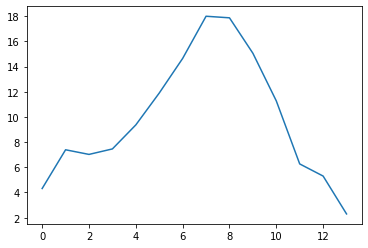

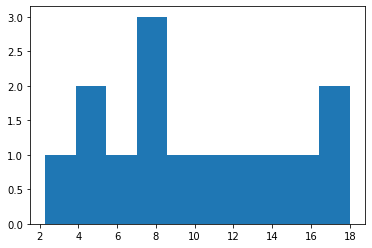

In [77]:
# line plot
pyplot.plot(df_sq_r)
pyplot.show()
# histogram
pyplot.hist(df_sq_r)
pyplot.show()

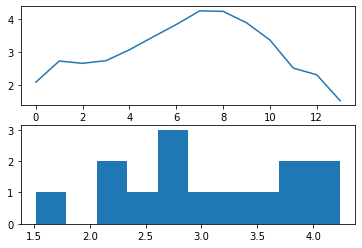

In [78]:
# Square root transform
transform = series = sqrt(df_sq_r)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

The downsampled data doesnt seem to be in Gaussian distribution after Square root transform.

#### Square Root Transform on the resampled daily data

In [79]:
# for resampled daily data
df_sq_d = df11['temperature'].squeeze()

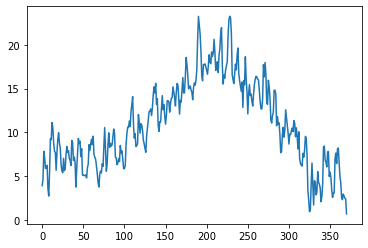

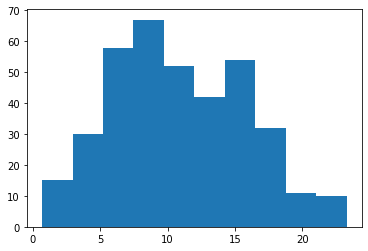

In [80]:
# line plot
pyplot.plot(df_sq_d)
pyplot.show()
# histogram
pyplot.hist(df_sq_d)
pyplot.show()

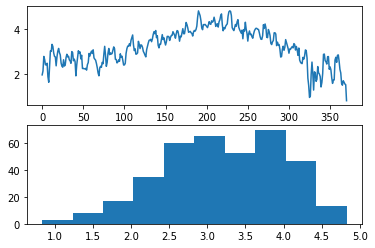

In [81]:
# Square root transform
transform = series = sqrt(df_sq_d)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

The downsampled data doesnt seem to be in Gaussian distribution after Square root transform.

#### Log Transform

Time series with an exponential distribution can be made linear by taking the logarithm of the values. This is called a log transform.

Log transforms are popular with time series data as they are effective at removing exponential variance.

#### Log Transform on the orignal dataset

In [82]:
# using the original dataset
df_= dataset.copy()
# converting to list
d_list = df_["temperature"].tolist()

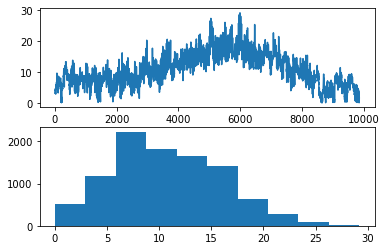

In [83]:
series = [exp(i) for i in d_list]
transform = log(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

The data after the log trasformation is not Gaussian distributed.

#### Log Transform on the resampled daily dataset

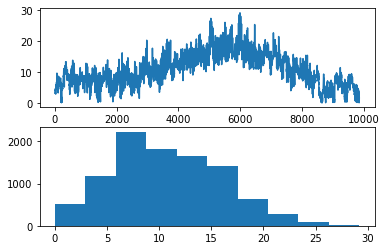

In [84]:
df_sq_dlog = df11.copy()

d_list_sq_dlog = df_sq_dlog["temperature"].tolist()
series = [exp(i) for i in d_list]
transform = log(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

The data after the log trasformation is not Gaussian distributed.

#### Transform with constant on the original dataset

In [85]:
df_c = dataset['temperature'].squeeze()
transform = log(5 + df_c)

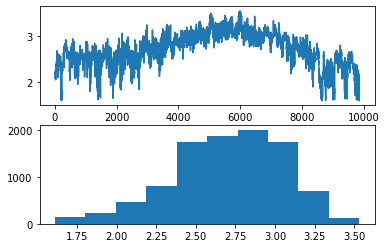

In [86]:
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

#### Transform with constant on the resampled daily dataset

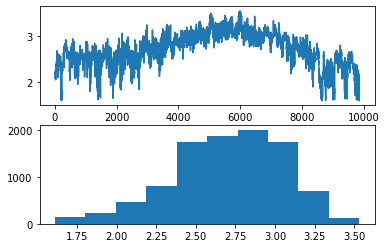

In [87]:
df_c_r = df11['temperature'].squeeze()
transform = log(5 + df_c)

pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

#### Box-Cox Transform

The Box-Cox transform is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms.

lambda = -1. is a reciprocal transform.

lambda = -0.5 is a reciprocal square root transform.

lambda = 0.0 is a log transform.

lambda = 0.5 is a square root transform.

lambda = 1.0 is no transform.

#### Box-Cox Transform on the original dataset

In [88]:

df_box = dataset[['temperature']]
#taking only the positive data to avoid the error
posdata = df_box[df_box['temperature'] > 0]
posdata

,temperature
0,3.1
1,3.3
2,3.3
3,3.3
4,3.6
...,...
9855,0.7
9857,0.3
9858,0.4
9859,0.8


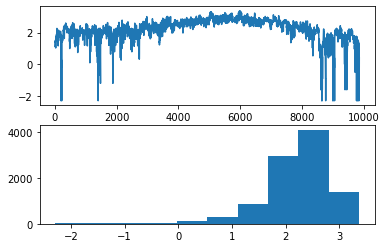

In [89]:
# boxcox with lambda=0.0
posdata['temperature'] = boxcox(posdata['temperature'], lmbda=0.0)
#print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(posdata['temperature'])
# histogram
pyplot.subplot(212)
pyplot.hist(posdata['temperature'])
pyplot.show()

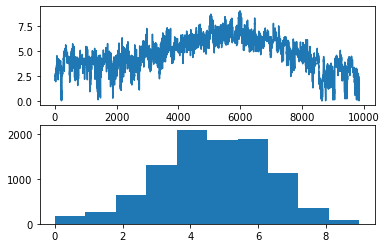

In [90]:
# using boxcox1p to aviod the erros
#lambda - 0.5
df_box = df_box.apply(lambda x: boxcox1p(x,0.5))
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(df_box['temperature'])
# histogram
pyplot.subplot(212)
pyplot.hist(df_box['temperature'])
pyplot.show()

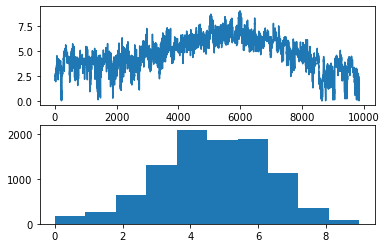

In [91]:
# using boxcox1p to avoid  errors
#lambda - 1
df_box = df_box.apply(lambda x: boxcox1p(x,1))
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(df_box['temperature'])
# histogram
pyplot.subplot(212)
pyplot.hist(df_box['temperature'])
pyplot.show()

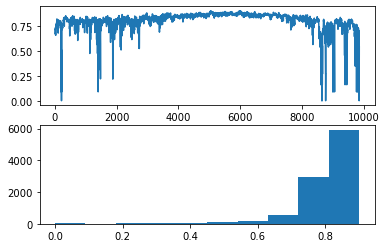

In [92]:
# using boxcox1p to avoid errors
#lambda - -1
df_box = df_box.apply(lambda x: boxcox1p(x,-1))
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(df_box['temperature'])
# histogram
pyplot.subplot(212)
pyplot.hist(df_box['temperature'])
pyplot.show()

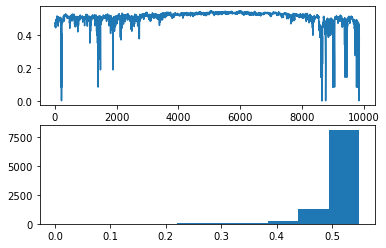

In [93]:
# using boxcox1p to deal with the positive values
#lambda - -0.5
df_box = df_box.apply(lambda x: boxcox1p(x,-0.5))
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(df_box['temperature'])
# histogram
pyplot.subplot(212)
pyplot.hist(df_box['temperature'])
pyplot.show()

#### Box-Cox Transform with the resampled daily data

In [94]:
df_box_ = df11[['temperature']]
#taking only the positive data to avoid the error
posdata = df_box_[df_box_['temperature'] > 0]
posdata

,temperature
0,3.93
1,4.65
2,7.85
3,7.11
4,5.90
...,...
366,2.97
367,2.75
368,2.49
369,2.40


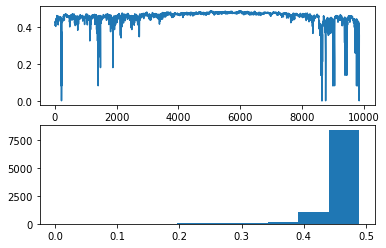

In [95]:
# using boxcox1p to aviod the erros
#lambda - 0.5
df_box_ = df_box.apply(lambda x: boxcox1p(x,0.5))
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(df_box_['temperature'])
# histogram
pyplot.subplot(212)
pyplot.hist(df_box_['temperature'])
pyplot.show()

The data is roughly Gaussian distributed.

From the transform techniques used, Square root transfor is found to be appropriate for the dataset. It transforms the data to normal distribution.

## Smoothing Techniques

Smoothing is a technique applied to time series to remove the fine-grained variation between time steps.

#### Moving Average Smoothing with the resampled daily data

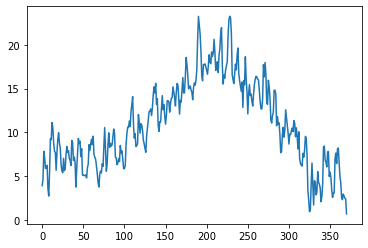

In [96]:
# moving average smoothing with the resampled daily data
# plotting the resampled data
df_smoothing = df11['temperature'].squeeze()

ax = df_smoothing.plot()
pyplot.show()

0     NaN
1     NaN
2    5.48
3    6.53
4    6.95
5    6.30
6    6.02
7    5.25
8    4.20
9    3.94
Name: temperature, dtype: float64


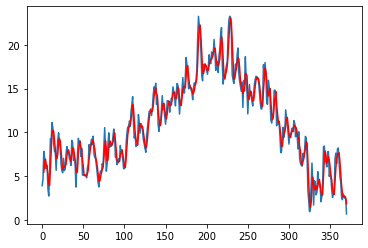

In [97]:
# Trail-rolling average transform for resampled data
rolling = df_smoothing.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
df_smoothing.plot()
rolling_mean.plot(color='red')
pyplot.show()

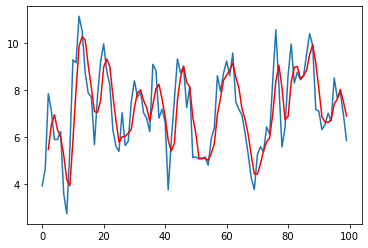

In [98]:
# zoom plot to get better idea 
pyplot.plot(df_smoothing[0:100])
pyplot.plot(rolling_mean[0:100], color='red')
pyplot.show()

#### moving average smoothing with the original data

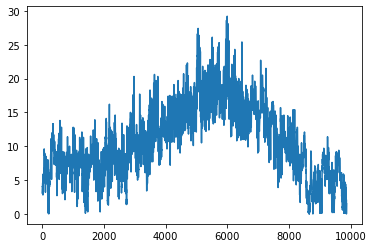

In [99]:
# moving average smoothing with the original data
# plotting the original data

df_smoothing_org = dataset.copy()
df_smoothing_org = df_smoothing_org['temperature'].squeeze()

ax = df_smoothing_org.plot()
pyplot.show()

0     NaN
1     NaN
2    3.23
3    3.30
4    3.40
5    3.60
6    3.83
7    3.97
8    4.00
9    4.03
Name: temperature, dtype: float64


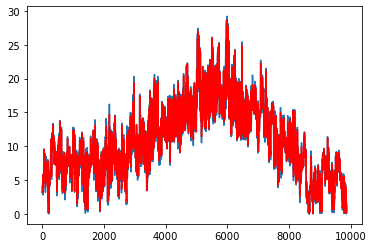

In [100]:
# Trail-rolling average transform for original data
rolling = df_smoothing_org.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
df_smoothing_org.plot()
rolling_mean.plot(color='red')
pyplot.show()

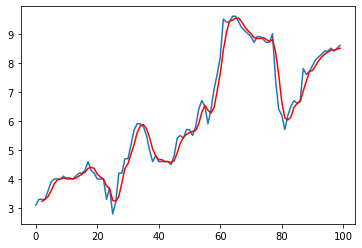

In [101]:
# zoom plot to get better idea about the lag 
pyplot.plot(df_smoothing_org[0:100])
pyplot.plot(rolling_mean[0:100], color='red')
pyplot.show()

#### Moving average for prediction using the resampled daily data

The moving average model for predictions can easily be used in a walk-forward manner. As new observations are made available (e.g. daily), the model can be updated and a prediction made for the next day.

In [102]:
# prepare situation
# using the resampled daily data
df_smoothing = df11['temperature'].squeeze()
X = df_smoothing.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


predicted=5.476326, expected=7.106897
predicted=6.534686, expected=5.896429
predicted=6.949495, expected=5.906897
predicted=6.303407, expected=6.242857
predicted=6.015394, expected=3.610000
predicted=5.253251, expected=2.740000
predicted=4.197619, expected=5.464516
predicted=3.938172, expected=9.281250
predicted=5.828589, expected=9.160714
predicted=7.968827, expected=11.134615
predicted=9.858860, expected=10.512121
predicted=10.269150, expected=8.734483
predicted=10.127073, expected=7.858065
predicted=9.034889, expected=7.720000
predicted=8.104182, expected=5.685185
predicted=7.087750, expected=7.741379
predicted=7.048855, expected=9.200000
predicted=7.542188, expected=9.962963
predicted=8.968114, expected=8.803846
predicted=9.322270, expected=8.219231
predicted=8.995347, expected=6.316667
predicted=7.779915, expected=5.608333
predicted=6.714744, expected=5.400000
predicted=5.775000, expected=7.042308
predicted=6.016880, expected=5.641667
predicted=6.027991, expected=5.825000
predicte

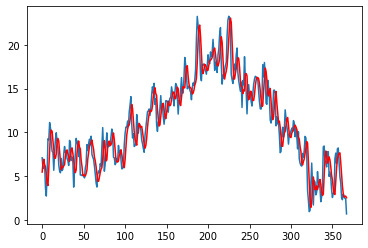

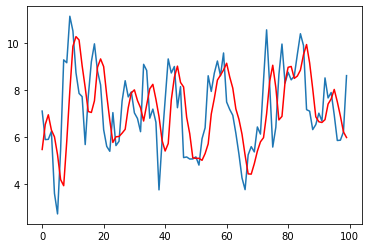

In [103]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot to get better idea
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()

#### Moving average for prediction using the originaldata

In [104]:
# prepare situation
# using the originaldata
df_smoothing_pre = dataset['temperature'].squeeze()
X = df_smoothing_pre.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


predicted=3.233333, expected=3.300000
predicted=3.300000, expected=3.600000
predicted=3.400000, expected=3.900000
predicted=3.600000, expected=4.000000
predicted=3.833333, expected=4.000000
predicted=3.966667, expected=4.000000
predicted=4.000000, expected=4.100000
predicted=4.033333, expected=4.000000
predicted=4.033333, expected=4.000000
predicted=4.033333, expected=4.000000
predicted=4.000000, expected=4.100000
predicted=4.033333, expected=4.200000
predicted=4.100000, expected=4.200000
predicted=4.166667, expected=4.300000
predicted=4.233333, expected=4.600000
predicted=4.366667, expected=4.300000
predicted=4.400000, expected=4.200000
predicted=4.366667, expected=4.000000
predicted=4.166667, expected=4.000000
predicted=4.066667, expected=4.000000
predicted=4.000000, expected=3.300000
predicted=3.766667, expected=3.700000
predicted=3.666667, expected=2.800000
predicted=3.266667, expected=3.200000
predicted=3.233333, expected=4.200000
predicted=3.400000, expected=4.200000
predicted=3.

predicted=5.433333, expected=5.100000
predicted=5.000000, expected=3.800000
predicted=4.500000, expected=4.400000
predicted=4.433333, expected=5.300000
predicted=4.500000, expected=7.300000
predicted=5.666667, expected=8.300000
predicted=6.966667, expected=9.500000
predicted=8.366667, expected=9.900000
predicted=9.233333, expected=10.800000
predicted=10.066667, expected=11.700000
predicted=10.800000, expected=12.400000
predicted=11.633333, expected=12.300000
predicted=12.133333, expected=11.400000
predicted=12.033333, expected=11.300000
predicted=11.666667, expected=10.900000
predicted=11.200000, expected=10.900000
predicted=11.033333, expected=10.200000
predicted=10.666667, expected=7.500000
predicted=9.533333, expected=7.300000
predicted=8.333333, expected=8.400000
predicted=7.733333, expected=8.200000
predicted=7.966667, expected=7.700000
predicted=8.100000, expected=6.100000
predicted=7.333333, expected=6.000000
predicted=6.600000, expected=6.100000
predicted=6.066667, expected=6.8

predicted=20.433333, expected=18.200000
predicted=19.533333, expected=16.100000
predicted=18.000000, expected=15.900000
predicted=16.733333, expected=14.600000
predicted=15.533333, expected=14.200000
predicted=14.900000, expected=14.700000
predicted=14.500000, expected=13.500000
predicted=14.133333, expected=13.100000
predicted=13.766667, expected=12.200000
predicted=12.933333, expected=12.400000
predicted=12.566667, expected=13.900000
predicted=12.833333, expected=14.700000
predicted=13.666667, expected=15.900000
predicted=14.833333, expected=16.700000
predicted=15.766667, expected=17.000000
predicted=16.533333, expected=18.600000
predicted=17.433333, expected=19.900000
predicted=18.500000, expected=20.200000
predicted=19.566667, expected=19.900000
predicted=20.000000, expected=19.800000
predicted=19.966667, expected=19.600000
predicted=19.766667, expected=19.500000
predicted=19.633333, expected=19.900000
predicted=19.666667, expected=19.700000
predicted=19.700000, expected=18.600000


predicted=11.866667, expected=10.500000
predicted=11.100000, expected=10.600000
predicted=10.533333, expected=10.600000
predicted=10.566667, expected=10.400000
predicted=10.533333, expected=10.300000
predicted=10.433333, expected=10.600000
predicted=10.433333, expected=10.600000
predicted=10.500000, expected=10.800000
predicted=10.666667, expected=11.300000
predicted=10.900000, expected=11.300000
predicted=11.133333, expected=10.600000
predicted=11.066667, expected=10.900000
predicted=10.933333, expected=10.900000
predicted=10.800000, expected=10.800000
predicted=10.866667, expected=10.800000
predicted=10.833333, expected=10.800000
predicted=10.800000, expected=10.600000
predicted=10.733333, expected=10.500000
predicted=10.633333, expected=11.300000
predicted=10.800000, expected=12.300000
predicted=11.366667, expected=13.700000
predicted=12.433333, expected=15.200000
predicted=13.733333, expected=13.600000
predicted=14.166667, expected=14.600000
predicted=14.466667, expected=13.500000


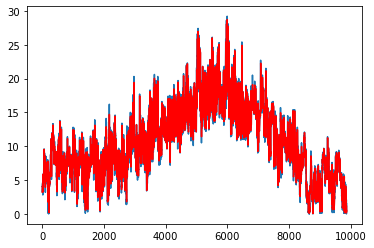

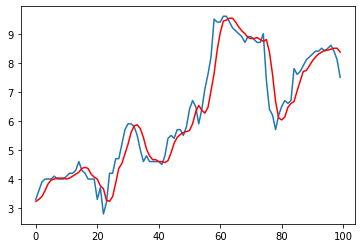

In [105]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot to get better idea
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()

#### Exponential smoothing with original data

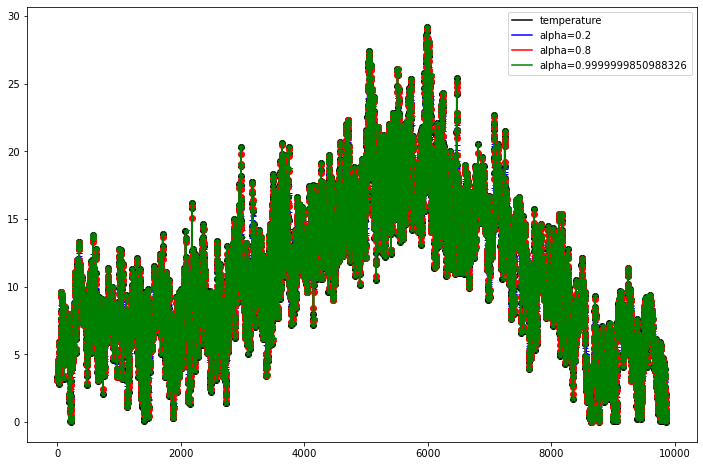

In [106]:
import pandas as pd
from statsmodels.tsa.api import SimpleExpSmoothing

data = dataset['temperature'].squeeze()

#First Instance
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')

#Third Instance
ins3 = SimpleExpSmoothing(data).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = data.plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()

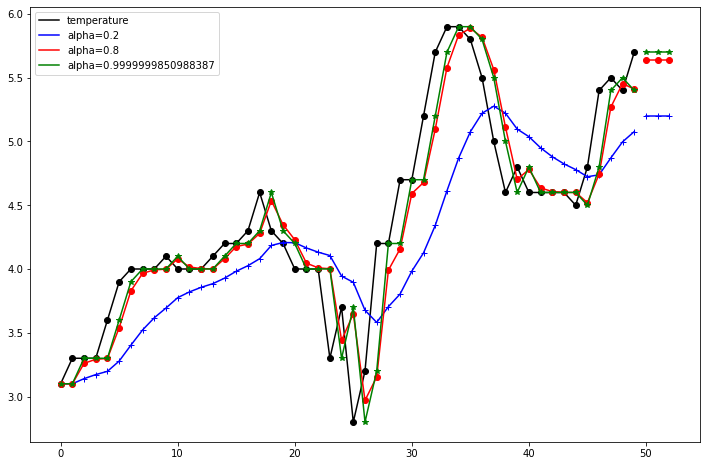

In [107]:
## zoom in version

data = dataset['temperature'].squeeze()
data = data[0:50]

#First Instance
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')

#Third Instance
ins3 = SimpleExpSmoothing(data).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = data.plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()

The moving averages data was found to be closely following the actual data. Exponential smoothing is also applied to the data and optimal alpha value is found be 0.99.

## ARIMA Model

#### ARIMA model using the resampled monthly data

In [108]:
# using the resampled monthly data
df_down_s = df_down_single.set_index('date')

In [109]:
df_down_s

,temperature
date,
2009-12-01,4.31
2010-01-01,7.39
2010-02-01,7.02
2010-03-01,7.46
2010-04-01,9.37
2010-05-01,11.90
2010-06-01,14.65
2010-07-01,18.00
2010-08-01,17.87


Here, I am using the resampled monthly data because its frequency is constant compared to the original hourly data. Some hourly weather details are not available in the original data which makes its frequency not constant. 

We have to ensure the model is staionary before building the model.
By using rolling statistics and Augmented Dickey-Fuller Test we can ensure this.

#### Rolling Statistics: 
    Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time.

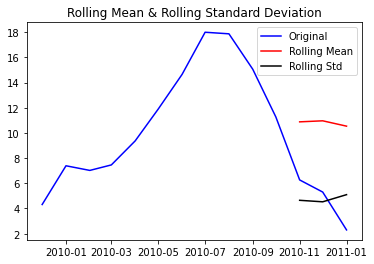

In [110]:
# checking whether the data is staionary
rolling_mean = df_down_s.rolling(window = 12).mean()
rolling_std = df_down_s.rolling(window = 12).std()
plt.plot(df_down_s, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

#### Augmented Dickey-Fuller Test: 
    The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics

In [111]:
result = adfuller(df_down_s['temperature'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.319159955579655
p-value: 0.16586294290157483
Critical Values:
	1%: -4.223238279489106
	5%: -3.189368925619835
	10%: -2.729839421487603


Here p- value is greater than the threshold value 0.05 and the ADF statistics are far away from the critical values. So the time series is not statinary.

In [112]:
# making the data staionary 

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['temperature'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

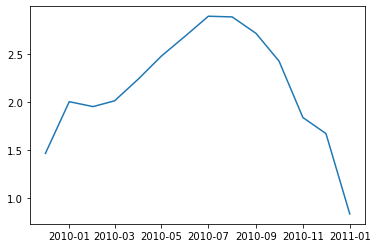

In [113]:
# Taking the log of the dependent variable will lower the rate at which rolling mean increases.

df_log = np.log(df_down_s)
plt.plot(df_log)

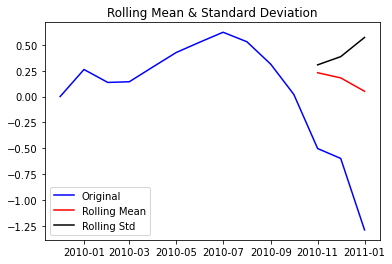

ADF Statistic: -3.178555960489786
p-value: 0.021259985156159587
Critical Values:
	1%: -4.331573
	5%: -3.23295
	10%: -2.7487


In [114]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

here the p-value is less than 0.05. So data is stationary.

In [115]:
# choosing the order for the model using Adfuller test
df = df_down_single[['temperature']]
df1 = df.temperature

result = adfuller(df1.dropna())
print('p-value = ',result[1])
result = adfuller(df1.diff().dropna())
print('p-value = ',result[1])
result = adfuller(df1.diff().diff().dropna())
print('p-value = ',result[1])
result = adfuller(df1.diff().diff().diff().dropna())
print('p-value = ',result[1])

p-value =  0.16586294290157483
p-value =  0.5618176371266308
p-value =  0.009534537869291636
p-value =  0.0009568077665665971


Here te pvalue become less than 0.05 after the second 2nd order differencing. So order is d = 2.

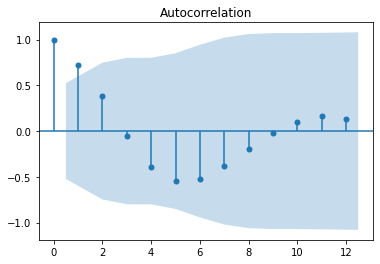

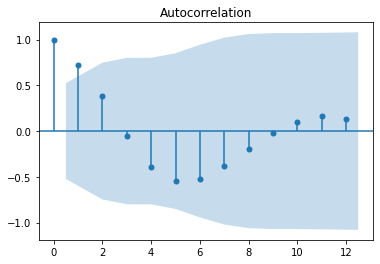

In [116]:
# auto correlation and partial auto correlation graphs
plot_acf(df)

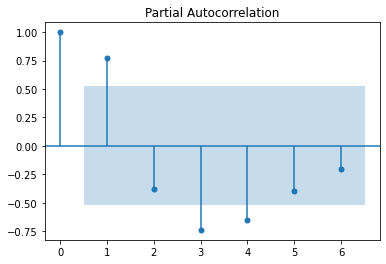

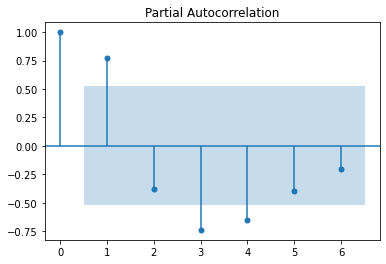

In [117]:
plot_pacf(df, lags=6)
#df

#### ARIMA using the resampled monthly data

In [118]:
# grid search ARIMA parameters for time series
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df_log.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.754
ARIMA(0, 0, 1) RMSE=0.554
ARIMA(0, 0, 2) RMSE=0.541
ARIMA(0, 1, 0) RMSE=0.555
ARIMA(0, 1, 1) RMSE=0.648
ARIMA(0, 1, 2) RMSE=0.632
ARIMA(0, 2, 0) RMSE=0.374
ARIMA(0, 2, 1) RMSE=0.426
ARIMA(1, 0, 0) RMSE=0.486
ARIMA(1, 1, 0) RMSE=0.513
ARIMA(1, 2, 0) RMSE=0.319
ARIMA(2, 0, 0) RMSE=0.415
ARIMA(2, 1, 0) RMSE=0.562
ARIMA(2, 2, 0) RMSE=0.370
Best ARIMA(1, 2, 0) RMSE=0.319


                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   12
Model:                 ARIMA(1, 2, 0)   Log Likelihood                  -0.177
Method:                       css-mle   S.D. of innovations              0.238
Date:                Mon, 02 May 2022   AIC                              6.354
Time:                        16:32:58   BIC                              7.809
Sample:                             2   HQIC                             5.815
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0753      0.042     -1.800      0.072      -0.157       0.007
ar.L1.D2.y    -0.7393      0.266     -2.775      0.006      -1.262      -0.217
                                    Roots           

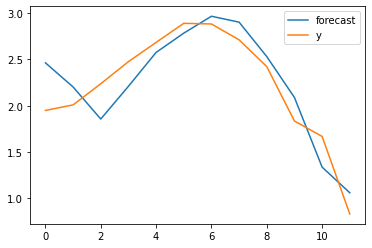

In [119]:
# Best ARIMA(1, 2, 0)ARIMA Model
model = ARIMA(df_log.values, order=(1,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# Actual vs Fitted values Graph
model_fit.plot_predict(dynamic=False)
plt.show()

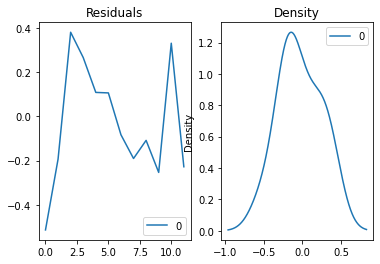

In [120]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [121]:

print(residuals.describe())

           0
count  12.00
mean   -0.03
std     0.27
min    -0.51
25%    -0.20
50%    -0.10
75%     0.15
max     0.38


We can see, there is a very small bias in the model. Ideally, the mean should have been zero. Here the mean is -0.03. Since the bias is very small and the residual plot is roughly Guassian I am not performing the bias correction.

In [122]:
# we can also build arima by dividing the data to test and train
# Create Training and Test from the resampled monthly data without taking log
train = df.iloc[3:15]
test = df.iloc[1:4]

model = ARIMA(train, order=(1,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D2.temperature   No. Observations:                    9
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 -19.479
Method:                       css-mle   S.D. of innovations              2.106
Date:                Mon, 02 May 2022   AIC                             44.959
Time:                        16:32:58   BIC                             45.551
Sample:                             2   HQIC                            43.682
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5427      0.646     -0.841      0.401      -1.808       0.723
ar.L1.D2.temperature    -0.0986      0.328     -0.301      0.764      -0.741       0.544
            

#### Auto ARIMA on the resampled data after its made stationary

In [123]:

model = pm.auto_arima(df_log.values, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=12, max_q=12, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)



print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=8.605, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=6.354, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8.311, Time=0.00 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=8.238, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=8.241, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=7.304, Time=0.00 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0] intercept
Total fit time: 0.335 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:               SARIMAX(1, 2, 0)   Log Likelihood                  -0.177
Date:                Mon, 02 May 2022   AIC                              6.354
Time:                        16:32:59   BIC                     

Auto ARIMA chooses the model with the least AIC value. Here it is ARIMA(1,1,2)(0,0,0).

#### Trying to implemet ARIMA using the resampled daily data

In [124]:
# data
df_down_d = df11.set_index('date')

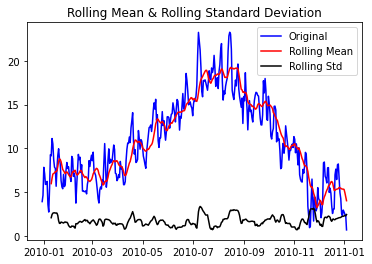

In [125]:
# checking whether the data is staionary
rolling_mean = df_down_d.rolling(window = 12).mean()
rolling_std = df_down_d.rolling(window = 12).std()
plt.plot(df_down_d, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [126]:
result = adfuller(df_down_d['temperature'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -0.8277701299394622
p-value: 0.8108284101000933
Critical Values:
	1%: -3.4485948978753314
	5%: -2.86957971128312
	10%: -2.571053050314224


In [127]:
# making the data staionary 

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['temperature'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

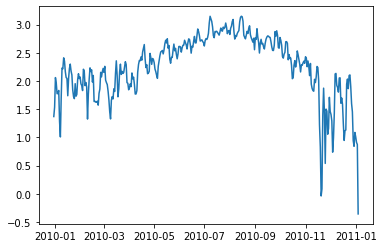

In [128]:
# Taking the log of the dependent variable will lower the rate at which rolling mean increases.

df_log = np.log(df_down_d)
plt.plot(df_log)

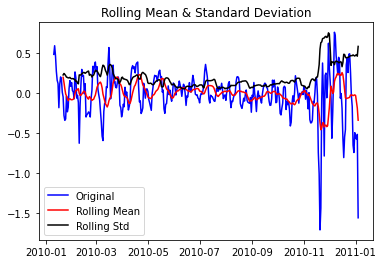

ADF Statistic: -8.130684332328697
p-value: 1.0923665074914318e-12
Critical Values:
	1%: -3.448748905151901
	5%: -2.8696473721448728
	10%: -2.5710891239349585


In [129]:
# substracting the rolling mean to render  the data to stationary

rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

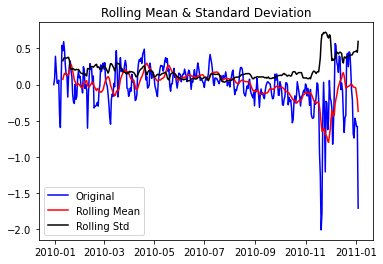

ADF Statistic: -5.579368107547874
p-value: 1.4080495323756623e-06
Critical Values:
	1%: -3.4482453822848496
	5%: -2.8694261442901396
	10%: -2.5709711770439507


In [130]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

The p value is greater than 0.05. So the data is not stationary. So ARIMA model can not be used here.

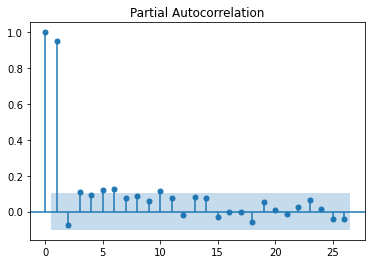

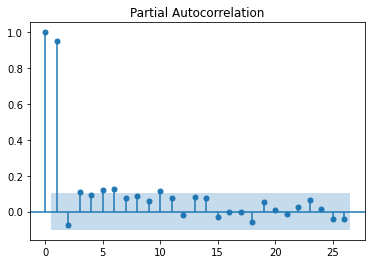

In [131]:
## Prtail correlation and autocorrelation grpahs
df_r_11 = df11[['temperature']]
plot_pacf(df_r_11)

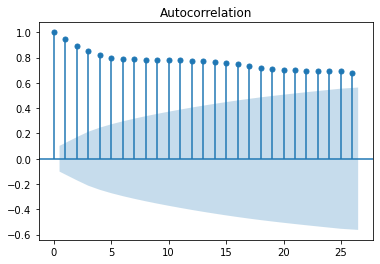

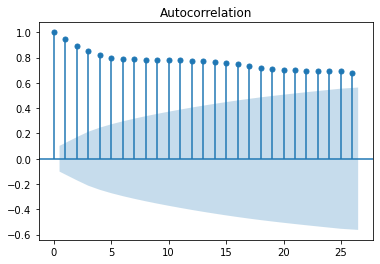

In [132]:
plot_acf(df_r_11)

Here all the lags are outside the confidence interval.

## Machine learning Model using the Window Shifted data

#### Linear Regression with Shift 1

In [133]:
data1 = sdata.dropna()
data1

,t,t+1
1,3.1,3.3
2,3.3,3.3
3,3.3,3.3
4,3.3,3.6
5,3.6,3.9
...,...,...
9856,0.7,0.0
9857,0.0,0.3
9858,0.3,0.4
9859,0.4,0.8


In [134]:
# train and test
x = data1[['t']]
y = data1[['t+1']]

In [135]:
# applying LR model
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state =20)
model1 = LinearRegression()
model1.fit(X_train, Y_train)
model1.score(X_test,Y_test)

0.9745603087204688

Accuracy is 97 %

In [136]:
result1=model1.predict(X_test)
result1

array([[ 6.74166743],
       [20.09483122],
       [15.34703965],
       ...,
       [ 9.90686181],
       [12.08293295],
       [ 8.71991392]])

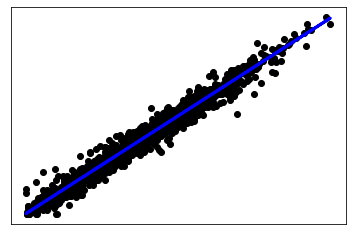

In [137]:
# Plot outputs
from matplotlib import pyplot as plt 
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, result1, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()